# Bem vindos de volta :)

![](https://media.giphy.com/media/XoW4aVP3LhBaoB7FuJ/giphy.gif)

## Preparando o ambiente

Vamos retomar com o que tínhamos

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

DATAPATH = '../data'

In [2]:
data = pd.read_csv(f'{DATAPATH}/house-prices.csv', index_col=0)

In [3]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
numerical_cols = [
    "LotFrontage",
    "LotArea",
    "OverallQual",
    "OverallCond",
    "YearBuilt",
    "YearRemodAdd",
    "MasVnrArea",
    "BsmtFinSF2",
    "BsmtUnfSF",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "Fireplaces",
    "GarageYrBlt",
    "GarageCars",
    "GarageArea",
    "WoodDeckSF",
    "OpenPorchSF",
    "EnclosedPorch",
    "3SsnPorch",
    "ScreenPorch",
    "PoolArea",
    "MiscVal",
    "MoSold",
    "YrSold",
    "SalePrice",
]

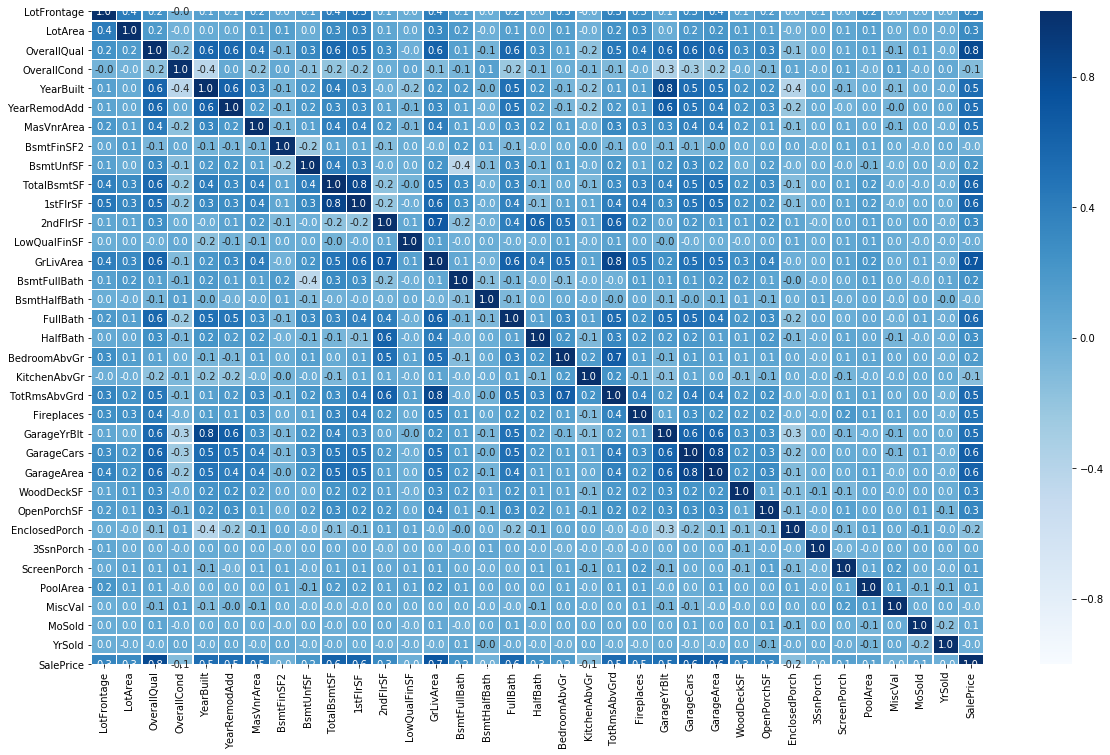

In [5]:
df_corr = data[numerical_cols].dropna().corr()
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, annot=True, fmt=".1f", linewidths=.5, cmap="Blues", 
            center=0, vmax=1.0, vmin=-1.0);

# O tal do modelo linear

Vimos no último vídeo do tópico passado que quando temos um *r*, ou *coeficiente de pearson* próximo de 1, nossos dados tem uma relação **linear** positiva, o que significa que podemos aplicar um modelo linear nele (o mesmo seria válido se o *r* fosse próximo de -1)

Olhando para o heatmap acima, e lembramos que **queremos prever o valor de casas**, a variável que tem o *r* mais alto é a OverallQual e a GrLivArea. Como a primeira é uma variável discreta e a segunda é contítnua, vamos plotar o scatterplot (ou gráfico de dispersão entre elas)?

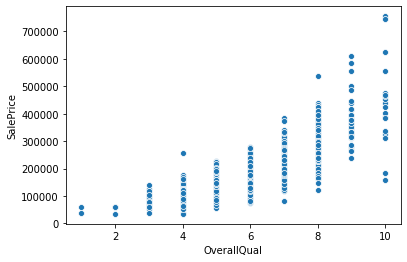

In [6]:
_ = sns.scatterplot(data['OverallQual'], data['SalePrice'])

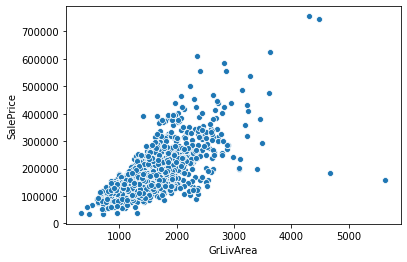

In [7]:
_ = sns.scatterplot(data['GrLivArea'], data['SalePrice'])

Por motivos de visualização, acho mais fácil seguirmos entre a relação da `GrLivArea` e o Sale Price. Relembrando:

- GrLivArea: Above grade (ground) living area square feet


Ou seja, vamos tentar prever o valor de **venda da casa** com relação à area da sala de estar! Como vamos fazer isso? Encontrando uma reta que represente bem esses dados!


Lembra da equação da reta?

$y=wx+b$


No caso, o $y$ é o **preço do aluguel** e o $x$ é a **área da sala de estar**

Ou seja, basta encontrar a angulação (ou coeficiente angular), $w$ e o coeficiente linear  (que localiza a reta), $b$.

Esse processo é conhecido como **regressão linear** :)

## Sopinha de Letras de Machine Learning

Quando falamos de Machine Learning, geralmente vamos cair em três casos:

- Aprendizado Surpervisionado (caso mais comum e exemplo desse Workshop)

- Aprendizado Não Surpervisionado

- Aprendizado por Reforço


![](../imgs/types-ml.png)


[Source](https://medium.com/deep-math-machine-learning-ai/different-types-of-machine-learning-and-their-types-34760b9128a2)

No caso de aprendizado surpervisionado, nós **temos** um conjunto de dados em que **sabemos** as respostas. No nosso exemplo **nós temos uma série de exemplos de preços de casas e queremos generalizar para casos nunca vistos**.

No caso do aprendizado não surpervisionado, nós **não** temos exemplos de resposta e aplicamos algoritmos que tentam "aprender" relações entre os dados para nos ajudar em alguma situação (por exemplo, visualização)

In [8]:
from IPython.display import YouTubeVideo

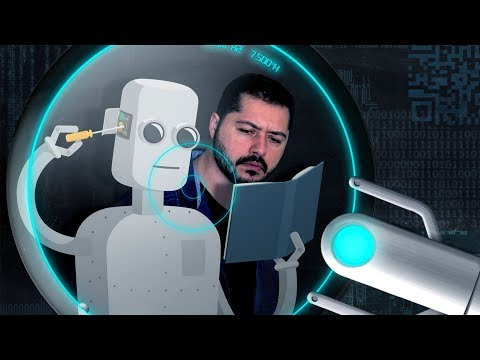

In [9]:
YouTubeVideo('mhe5e2B9bL8')

O que vocês acham do vídeo? 

Qual é problema que a gente tá tentando resolver???


<img src="https://media.giphy.com/media/aGOgOKmyBxCk8/giphy.gif" width="300">


Disclaimer: Deep Learning é **só** mais uma classe de algoritmos de aprendizado de máquinas


Regressão, então, é um tipo de problema de **aprendizado surpervisionado** em que tentamos prever um **número**. No caso, queremos prever **o valor das casas** com base na **area da sala de estar** por **meio de uma reta**. Por isso, então, é uma **regressão linear**!

# Aprendizado Surpervisionado

Sempre que falamos de aprendizado surpervisionado em Machine Learning, estamos falando de uma função que estamos tentando **otimizar**. Quando falamos de *otimização*, estamos nos referindo a algo que queremos minimizar ou maximizar. No nosso caso, queremos uma função $\hat{y} = f(x) = wx + b$ em que o valor previsto, $\hat{y}$ seja muito próximo ao valor real, $y$. Em outras palavras, queremos **minimizar** a diferença entre o **valor previsto e o real**. 


Como queremos minimizar isso para todos os pontos que temos, isto é:

In [10]:
len(data)

1460

Para todos os 1460 pontos, podemos montar uma função de erro (também conhecida como função de custo, ou *cost function*) que deve ser minimizada. Em outras palavras, queremos que dados $m$ e $b$, o **erro seja o menor possível** 

Existem várias formas de fazer isso, mas vamos definir a seguinte:

- Calculamos a diferença entre o valor real e o predito, ou seja ($y - \hat{y}$)

- Como  para alguns pontos $y \geq \hat{y}$ e $y \leq \hat{y}$ para outros, os valores podem se anular. Então elevamos tudo ao quadrado, $(y - \hat{y})^2$

- Somamos para todos os pontos e tiramos a média. Em resumo, nosso erro é definido por:

$E = \frac{1}{n}\sum{ (y_i - \hat{y_i})^2}$, 

para cada $i$ do nosso dataset. Lembrando que queremos encontrar $m$ e $b$ e $\hat{y} = mx + b$, então:

$E = \frac{1}{n}\sum{ (y_i - (wx_i+b))^2}$


Ou seja, nós elevamos os erros ao quadrado e tiramos a média, daí o nome *Mean Squared Error*, uma função de custo muito famosa no campo de ML.

## Aprendendo a reta

Vamos chamar $w$ de peso (*weights*) e $b$ de bias (ou viés), para facilitar a notação. O que queremos agora, então, é desenvolver um algoritmo que aprenda o peso $w$ e o bias $b$ do nosso **modelo** 

Para ilustrar, vamos tentar imaginar o seguinte exemplo:

- Você está no topo de uma montanha e quer chegar no fundo dela o mais rápido possível e você não sabe muito bem como chegar
- Você, então, procura o caminho que tê dá a maior inclinação e você vai andando passo a passo
- Então, você dá passos largos se para descer a inclinação for pouco íngrime e passos mais estreitos se for menos íngrime


<img src="../imgs/gradient-descent.jpeg" width="400"/>


[Source](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)


Vamos chamar cada "passo" de época e a intensidade desse passo, de learning rate $L$.


O que queremos então, é **partir de um ponto arbitrário de w e b** e fazer "correções" nos seus valores, um passo de cada vez, até que o valor da nossa função de custo seja a menor possível.

Para facilitar, vamos começar com w=0 e b=0, mas eles poderiam ser qualquer coisa

In [11]:
x = data['GrLivArea']
y = data['SalePrice']
w=0.0 #needs to be float
b=0.0 #needs to be float


y_hat = w*x + b

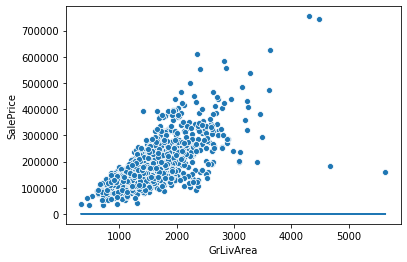

In [12]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
plt.plot(x, y_hat);

Não parece que essa reta teve um resultado muito bacana ):

Vamos definir nossa função de erro, como definimos mais cedo:

In [13]:
def predict(w, b, inputs):
    return w*inputs + b

In [14]:
inputs = x.values
targets = y.values
def loss(params_dict):
    preds = predict(params_dict['w'], params_dict['b'], inputs)
    return np.mean((targets-preds)**2)

In [15]:
loss({'w': w,'b': b})

39039267707.765755

Ótimo, agora como fazemos **uma alteração no nosso peso w** de forma que o **erro** seja reduzido?

Ora, essa é **exatamente** a interpretação da **derivada parcial do erro em relação a w**. Quando **falamos de derivadas** o que estamos tentando ver em, por exemplo, $\frac{df}{dx}$, como uma pequena mudança em $x$ altera o valor de $f$

**Como queremos calcular alterar os valores de w e b de forma a minimizar o erro, nós queremos as derivadas parciais da função de erro em relação a $w$ e a $b$**

A grande sacada aqui, é que o **gradiente** de uma função (no nosso caso, a função de erro), é a coleção de **todas as derivadas parciais em um vetor**. Ou seja, a cada passo, nós calculamos o gradiente da nossa função de custo e "corrigimos" o **w** e o **b** de forma a minimizar a função de erro.

Apesar de todos esses nomes, eu não vou entrar na matemática hoje (a ideia era só passar a intuição), até porquê muitos de vocês estão vendo cálculo 1 :)

Então eu vou **abstrair** toda a matemática do rolê :)

Na prática, o que vamos fazer é o seguinte:

![](../imgs/derivatives-ml.png)

Mas quem quiser, [aqui](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction); [aqui](https://pt.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/introduction-to-partial-derivatives), [aqui](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931) e [aqui](https://towardsdatascience.com/optimization-of-supervised-learning-loss-function-under-the-hood-df1791391c82#targetText=For%20supervised%20learning%2C%20models%20are,coefficients%20that%20minimize%20cost%20function.&targetText=The%20most%20commonly%20used%20loss,function%20is%20a%20parabola%20curve) tem ótimas referências

In [16]:
from jax import grad

In [17]:
gradients = grad(loss)({'w': w, 'b': b})

/Users/abarbosa/miniconda3/envs/semcomp2019/lib/python3.6/site-packages/jax/lib/xla_bridge.py:115: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [18]:
gradients

{'b': DeviceArray(-361842.38, dtype=float32),
 'w': DeviceArray(-6.0748224e+08, dtype=float32)}

In [19]:
gradients['w'], gradients['b']

(DeviceArray(-6.0748224e+08, dtype=float32),
 DeviceArray(-361842.38, dtype=float32))

Agora a gente atualiza os valores de $w$ e $b$ com a constante learning rate, $L$, que no nosso caso vai ser 0.001

In [20]:
L = 0.0000001

In [21]:
w = w - L*gradients['w'] # subtraimos pq estamos querendo minimizar)
b = b - L*gradients['b'] # subtraimos pq estamos querendo minimizar)

w = w.copy() #retorna um array do numpy
b = b.copy()

In [22]:
y_hat = w*x + b

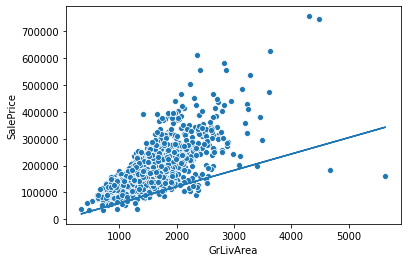

In [23]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
plt.plot(x, y_hat);

In [24]:
loss({'w': w,'b': b})

11629472613.033136

Nessa primeira rodada conseguimos fazer um ajuste da nossa reta e o nosso erro deu uma reduzida. O ideal é que rodemos esse algoritmos por um número $n$ de vezes, chamado épocas (ou epochs) e que ao final desse processo, **tenha ocorrido uma convergência**

In [25]:
from tqdm import tqdm_notebook

In [26]:
epochs = 1000  # The number of iterations to perform gradient descent

for i in tqdm_notebook(range(epochs)):
    gradients = grad(loss)({'w': w, 'b': b})
    w = w - L*gradients['w'] 
    b = b - L*gradients['b'] 
    w = w.copy()
    b = b.copy()

In [27]:
y_hat = w*x + b

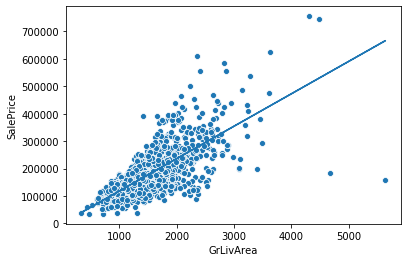

In [28]:
sns.scatterplot(data['GrLivArea'], data['SalePrice'])
plt.plot(x, y_hat);

In [29]:
loss({'w': w,'b': b})>11629472613.033136

False

![](https://media.giphy.com/media/JqDeI2yjpSRgdh35oe/giphy.gif)


Conseguimos! Teoricamente encontramos o menor erro possível da nossa função! Mas podemos levantar uma série de dúvidas agora:

- Como escolher a epoch e o learning rate
- Como saber se o modelo é bom?
- Fizemos tudo certo?
- Podemos fazer de uma forma mais eficiente?

### Epoch e Learning rate

## O modelo é bom?

### Métricas de Regressão

## Fizemos tudo certo?

### Premissas da Regressão Linear

## Podemos fazer mais rápido

### Ordinary Least Squares

### Porquê dois métodos diferentes?